# ***HARTH***

 ## **Introduction**

### You can download the data from this link : https://archive.ics.uci.edu/dataset/779/harth and add it to this folder to run it (since we could not uploading it in the assignement)

In this project, we are working with a series of CSV files containing sensor data from multiple participants. Each file contains time-series data collected from back and thigh sensors, along with a label indicating a specific activity or condition. Our goal is to preprocess and combine these individual files into a single comprehensive dataset for further analysis and machine learning tasks. Below is the Python code used to achieve this, along with an explanation of each step.

In [8]:
import pandas as pd
import os

# Directory containing your data files
data_dir = "/Users/djaiddouaa/Desktop/harth 2"

# Initialize an empty list to store DataFrames
dfs = []
id_values = []

# Loop through each file in the directory
for i, file_name in enumerate(sorted(os.listdir(data_dir))):
    if file_name.endswith('.csv'):  # Assuming your files are CSV format
        # Read the file into a DataFrame
        df = pd.read_csv(os.path.join(data_dir, file_name))
        
        # Rename columns to match the desired format
        df.rename(columns={'timestamp': 'timestamp', 
                           'back_x': 'back_x', 
                           'back_y': 'back_y', 
                           'back_z': 'back_z', 
                           'thigh_x': 'thigh_x', 
                           'thigh_y': 'thigh_y', 
                           'thigh_z': 'thigh_z', 
                           'label': 'label'}, inplace=True)
        
        # Reorder columns if needed
        df = df[['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']]
        
        # Add an 'id' attribute
        df['id'] = i  # Add 1 to match the order of participants
        
        # Append the DataFrame to the list
        dfs.append(df)
        
        # Add the id value to the list
        id_values.append(i)

# Concatenate the DataFrames
combined_df = pd.concat(dfs)

# Sort by id first, then by timestamp
combined_df.sort_values(by=['id', 'timestamp'], inplace=True)

# Reset the index and drop the old index column
combined_df.reset_index(drop=True, inplace=True)

# Save the combined data to a new file
combined_df.to_csv("combined_data_with_id_ordered.csv", index=False)


**Explanation :**
The code reads each CSV file, standardizes column names and order, assigns an ID to each participant, and combines all files into a single DataFrame, which is then sorted by participant ID and timestamp. Finally, the combined data is saved to a new CSV file.

# **Preprocessing**

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the combined dataset
combined_df = pd.read_csv("combined_data_with_id_ordered.csv")

# Check for missing values
missing_values = combined_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Convert 'timestamp' column to datetime format
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Optionally, perform feature scaling
columns_to_scale = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
scaler = StandardScaler()
combined_df[columns_to_scale] = scaler.fit_transform(combined_df[columns_to_scale])

# Display the first few rows of the modified DataFrame
print("\nModified DataFrame:")
print(combined_df.head())



Missing Values:
 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
id           0
dtype: int64

Modified DataFrame:
                timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0 2019-01-12 00:00:00.000  0.330293  1.353248  1.749055 -7.181078 -0.822551   
1 2019-01-12 00:00:00.010  0.939690  1.276724  1.341687  2.387553  0.684944   
2 2019-01-12 00:00:00.020 -0.757338  0.863492  0.006493  0.893189 -0.255631   
3 2019-01-12 00:00:00.030  0.625506  0.129082  0.315552 -1.531676 -2.501871   
4 2019-01-12 00:00:00.040  1.403332 -0.166845  0.153423  0.075705  0.308988   

    thigh_z  label  id  
0  0.454455      6   0  
1 -0.047014      6   0  
2 -1.209252      6   0  
3 -0.809751      6   0  
4 -1.397501      6   0  


**Explanation :**
This code snippet reads the combined dataset generated earlier and checks for missing values. The 'timestamp' column is converted to datetime format for easier manipulation. Optionally, feature scaling is performed on selected columns using standardization. Finally, the modified DataFrame, including scaled features, is displayed for inspection.

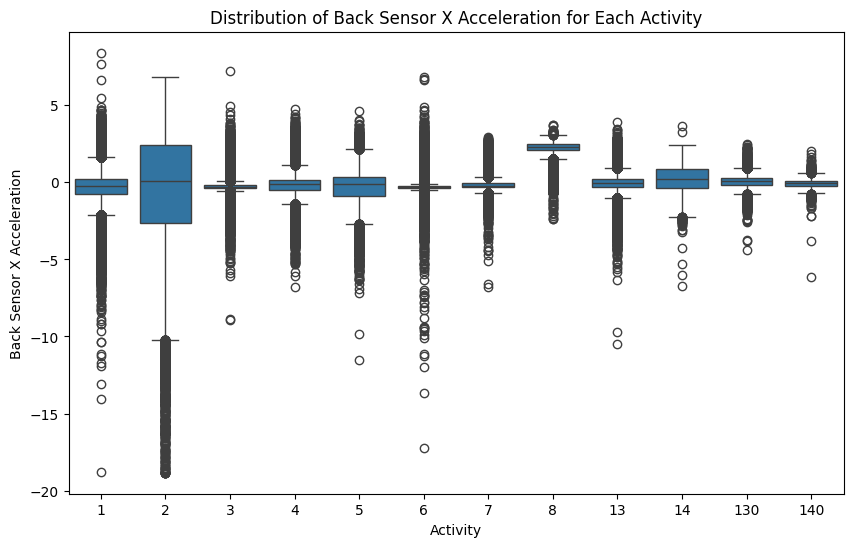

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a box plot of acceleration for each activity
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='back_x', data=combined_df)
plt.xlabel('Activity')
plt.ylabel('Back Sensor X Acceleration')
plt.title('Distribution of Back Sensor X Acceleration for Each Activity')
plt.show()



**Explanation :**
This code generates a box plot to visualize the distribution of the back sensor's X-axis acceleration for each activity in the dataset. Outliers in some classes are observed, indicating potential anomalies or extreme values in the data.

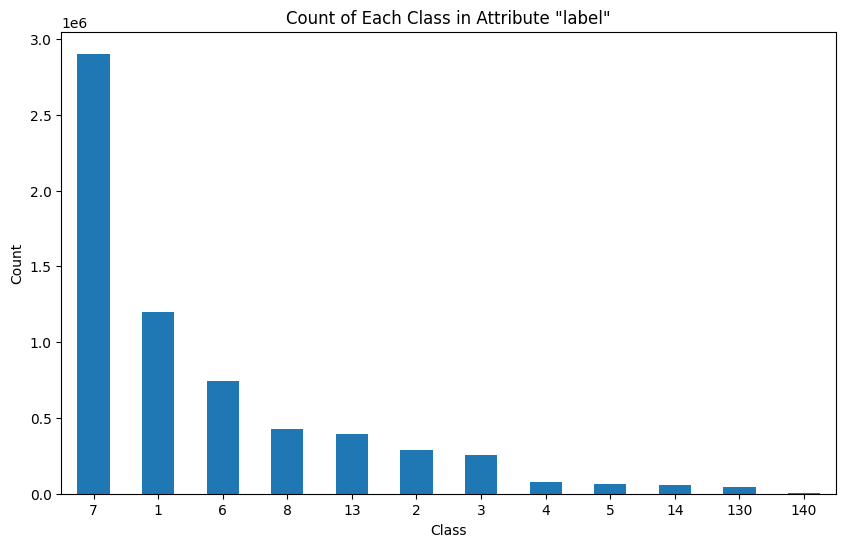

In [47]:
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame
label_counts = combined_df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Count of Each Class in Attribute "label"')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Explanation :**
This code generates a bar plot showing the count of each class in the attribute "label" of the dataset. Class 7 has the highest frequency of values, while classes like 4, 5, and 130 have relatively lower counts, indicating an imbalanced distribution of data across classes.

In [73]:
# Function to detect and remove extreme outliers using the IQR method with a higher multiplier
def remove_extreme_outliers_iqr(df, columns, multiplier=3.0):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the outlier removal function to the relevant columns with a higher multiplier
columns_to_check = columns_to_scale  # The same columns that were scaled
original_shape = combined_df.shape
cleaned_df = remove_extreme_outliers_iqr(combined_df, columns_to_check, multiplier=3.0)
cleaned_shape = cleaned_df.shape

# Display the number of rows before and after removing outliers
print("\nOriginal number of rows:", original_shape[0])
print("Number of rows after removing outliers:", cleaned_shape[0])


Original number of rows: 6461328
Number of rows after removing outliers: 5621385


**Explanation :**
This code segment applies outlier detection and removal using the Interquartile Range (IQR) method with a higher multiplier to specified columns in a DataFrame. It then displays the original number of rows and the number of rows after outliers are removed.

In [51]:
# Display the number of each class in the cleaned DataFrame
if 'label' in cleaned_df.columns:
    class_counts = cleaned_df['label'].value_counts()
    print("\nNumber of instances in each class after cleaning:")
    print(class_counts)
else:
    print("\n'label' column not found in the DataFrame.")


Number of instances in each class after cleaning:
label
7      2901130
1      1044552
6       741823
13      388586
3       250329
4        71723
2        61348
5        56013
14       48413
130      41555
8         8105
140       7808
Name: count, dtype: int64


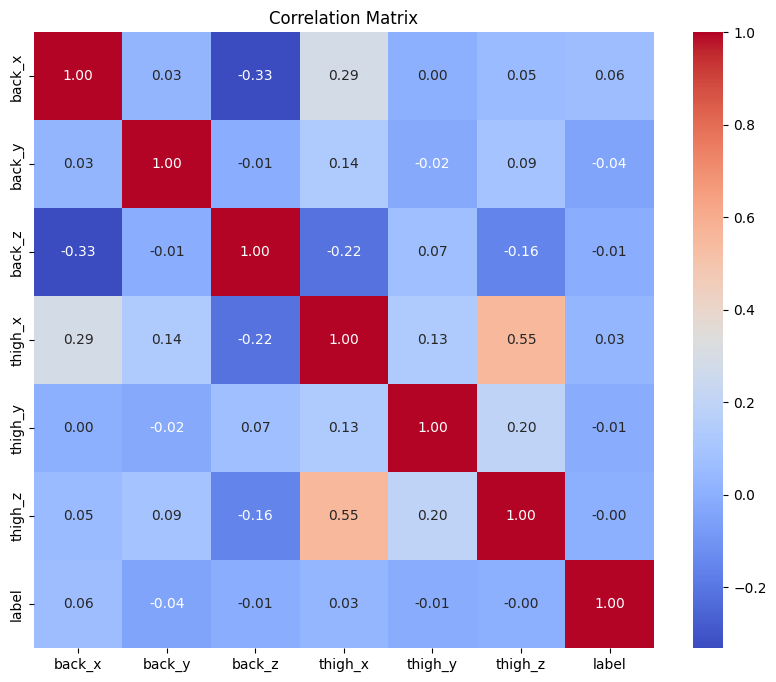

In [53]:
# Calculate the correlation matrix
correlation_matrix = cleaned_df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Explanation :**
This code calculates the correlation matrix between selected columns in the cleaned DataFrame and then visualizes it using a heatmap.it reveals moderate positive correlations between certain accelerometer axes, such as 'thigh_z' and 'thigh_x', indicating some degree of alignment in motion patterns.

In [54]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
cleaned_df[columns_to_scale] = scaler.fit_transform(cleaned_df[columns_to_scale])

 This preprocessing step ensures that all features have the same scale, which can improve the performance of certain machine learning algorithms.

# **Sampling**
The code performs stratified sampling on the combined DataFrame to create a smaller sampled DataFrame. It ensures that each participant's data is represented proportionally in the sample. If the desired sample size is not met, it randomly samples the remaining data. Finally, it displays the number of rows in the sampled DataFrame and the count of instances for each class in the sampled data, if the 'label' column exists.

In [57]:
num_participants = 22
sample_size = 1000000

# Calculate the sample size per participant
sample_size_per_participant = sample_size // num_participants

# Perform stratified sampling
sampled_df = combined_df.groupby('id', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_size_per_participant)))

# If the total sampled rows are less than the desired sample size, sample the remaining randomly
if len(sampled_df) < sample_size:
    remaining_sample_size = sample_size - len(sampled_df)
    remaining_sample = combined_df.drop(sampled_df.index).sample(remaining_sample_size)
    sampled_df = pd.concat([sampled_df, remaining_sample])

# Display the number of rows in the sampled DataFrame
print("\nNumber of rows in the sampled DataFrame:", len(sampled_df))

# Display the number of each class in the sampled DataFrame
if 'label' in sampled_df.columns:
    class_counts = sampled_df['label'].value_counts()
    print("\nNumber of instances in each class after sampling:")
    print(class_counts)
else:
    print("\n'Class' column not found in the DataFrame.")


Number of rows in the sampled DataFrame: 1000000

Number of instances in each class after sampling:
label
7      369836
1      224656
6      101957
13      85264
2       72447
8       65896
3       35101
4       12192
14      11805
5       11030
130      8295
140      1521
Name: count, dtype: int64


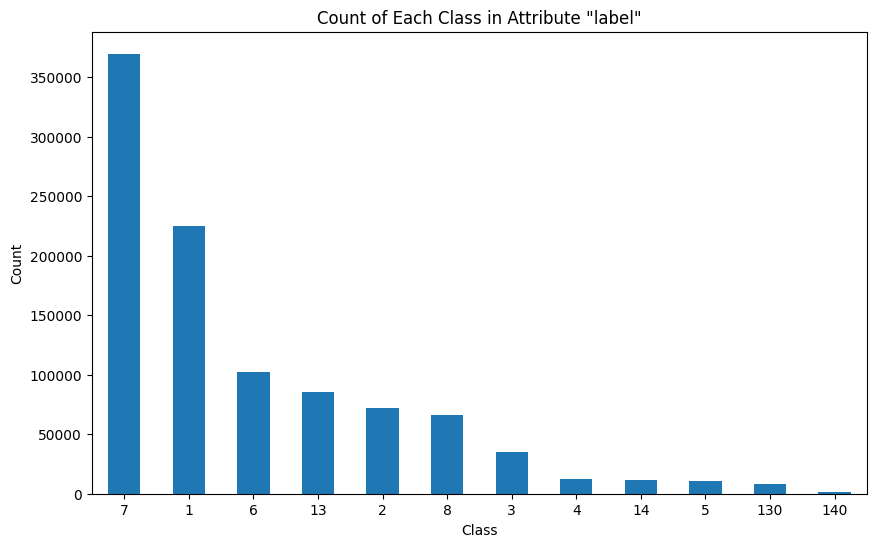

In [58]:
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame
label_counts = sampled_df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Count of Each Class in Attribute "label"')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# **Random Forest Classifier**

**1- On the full DataSet**

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

X = sampled_df.drop(columns=['timestamp', 'label', 'id'])
y = sampled_df['label']

# Ensure stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # Adjust cv value as needed
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Fit and evaluate on training set
rf_classifier.fit(X_train, y_train)
rf_train_pred = rf_classifier.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
print("Training Accuracy:", rf_train_accuracy)

# Evaluate on test set
rf_test_pred = rf_classifier.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
print("Testing Accuracy:", rf_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_test_pred))

# Additional Metrics
precision = precision_score(y_test, rf_test_pred, average='weighted')
recall = recall_score(y_test, rf_test_pred, average='weighted')
f1 = f1_score(y_test, rf_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Cross-Validation Scores: [0.8895375  0.89115    0.89013125 0.89048125 0.89116875]
Mean CV Accuracy: 0.8904937500000001
Training Accuracy: 0.99999625
Testing Accuracy: 0.89168

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.91      0.85     44931
           2       0.93      0.90      0.92     14490
           3       0.50      0.24      0.32      7020
           4       0.64      0.15      0.24      2439
           5       0.52      0.04      0.07      2206
           6       0.82      0.88      0.85     20391
           7       1.00      1.00      1.00     73967
           8       1.00      1.00      1.00     13179
          13       0.83      0.89      0.86     17053
          14       0.73      0.57      0.64      2361
         130       0.65      0.45      0.53      1659
         140       0.64      0.42      0.51       304

    accuracy                           0.89    200000
   macro avg       0.75      0.62      0.65

# **Discussion**

The results indicate that the random forest classifier achieved a mean cross-validation accuracy of approximately 89.05%. During training, the model achieved near-perfect accuracy, but on the test set, it performed slightly lower with an accuracy of 89.17%.

The classification report reveals varying performance across classes, with classes 7 and 8 achieving perfect precision, recall, and F1-score, indicating perfect predictions. However, classes 3, 4, and 5 have relatively low precision, recall, and F1-scores, suggesting challenges in accurately predicting these classes.

Overall, the model's weighted average precision, recall, and F1-score are approximately 88.11%, 89.17%, and 87.93%, respectively, indicating good overall performance.

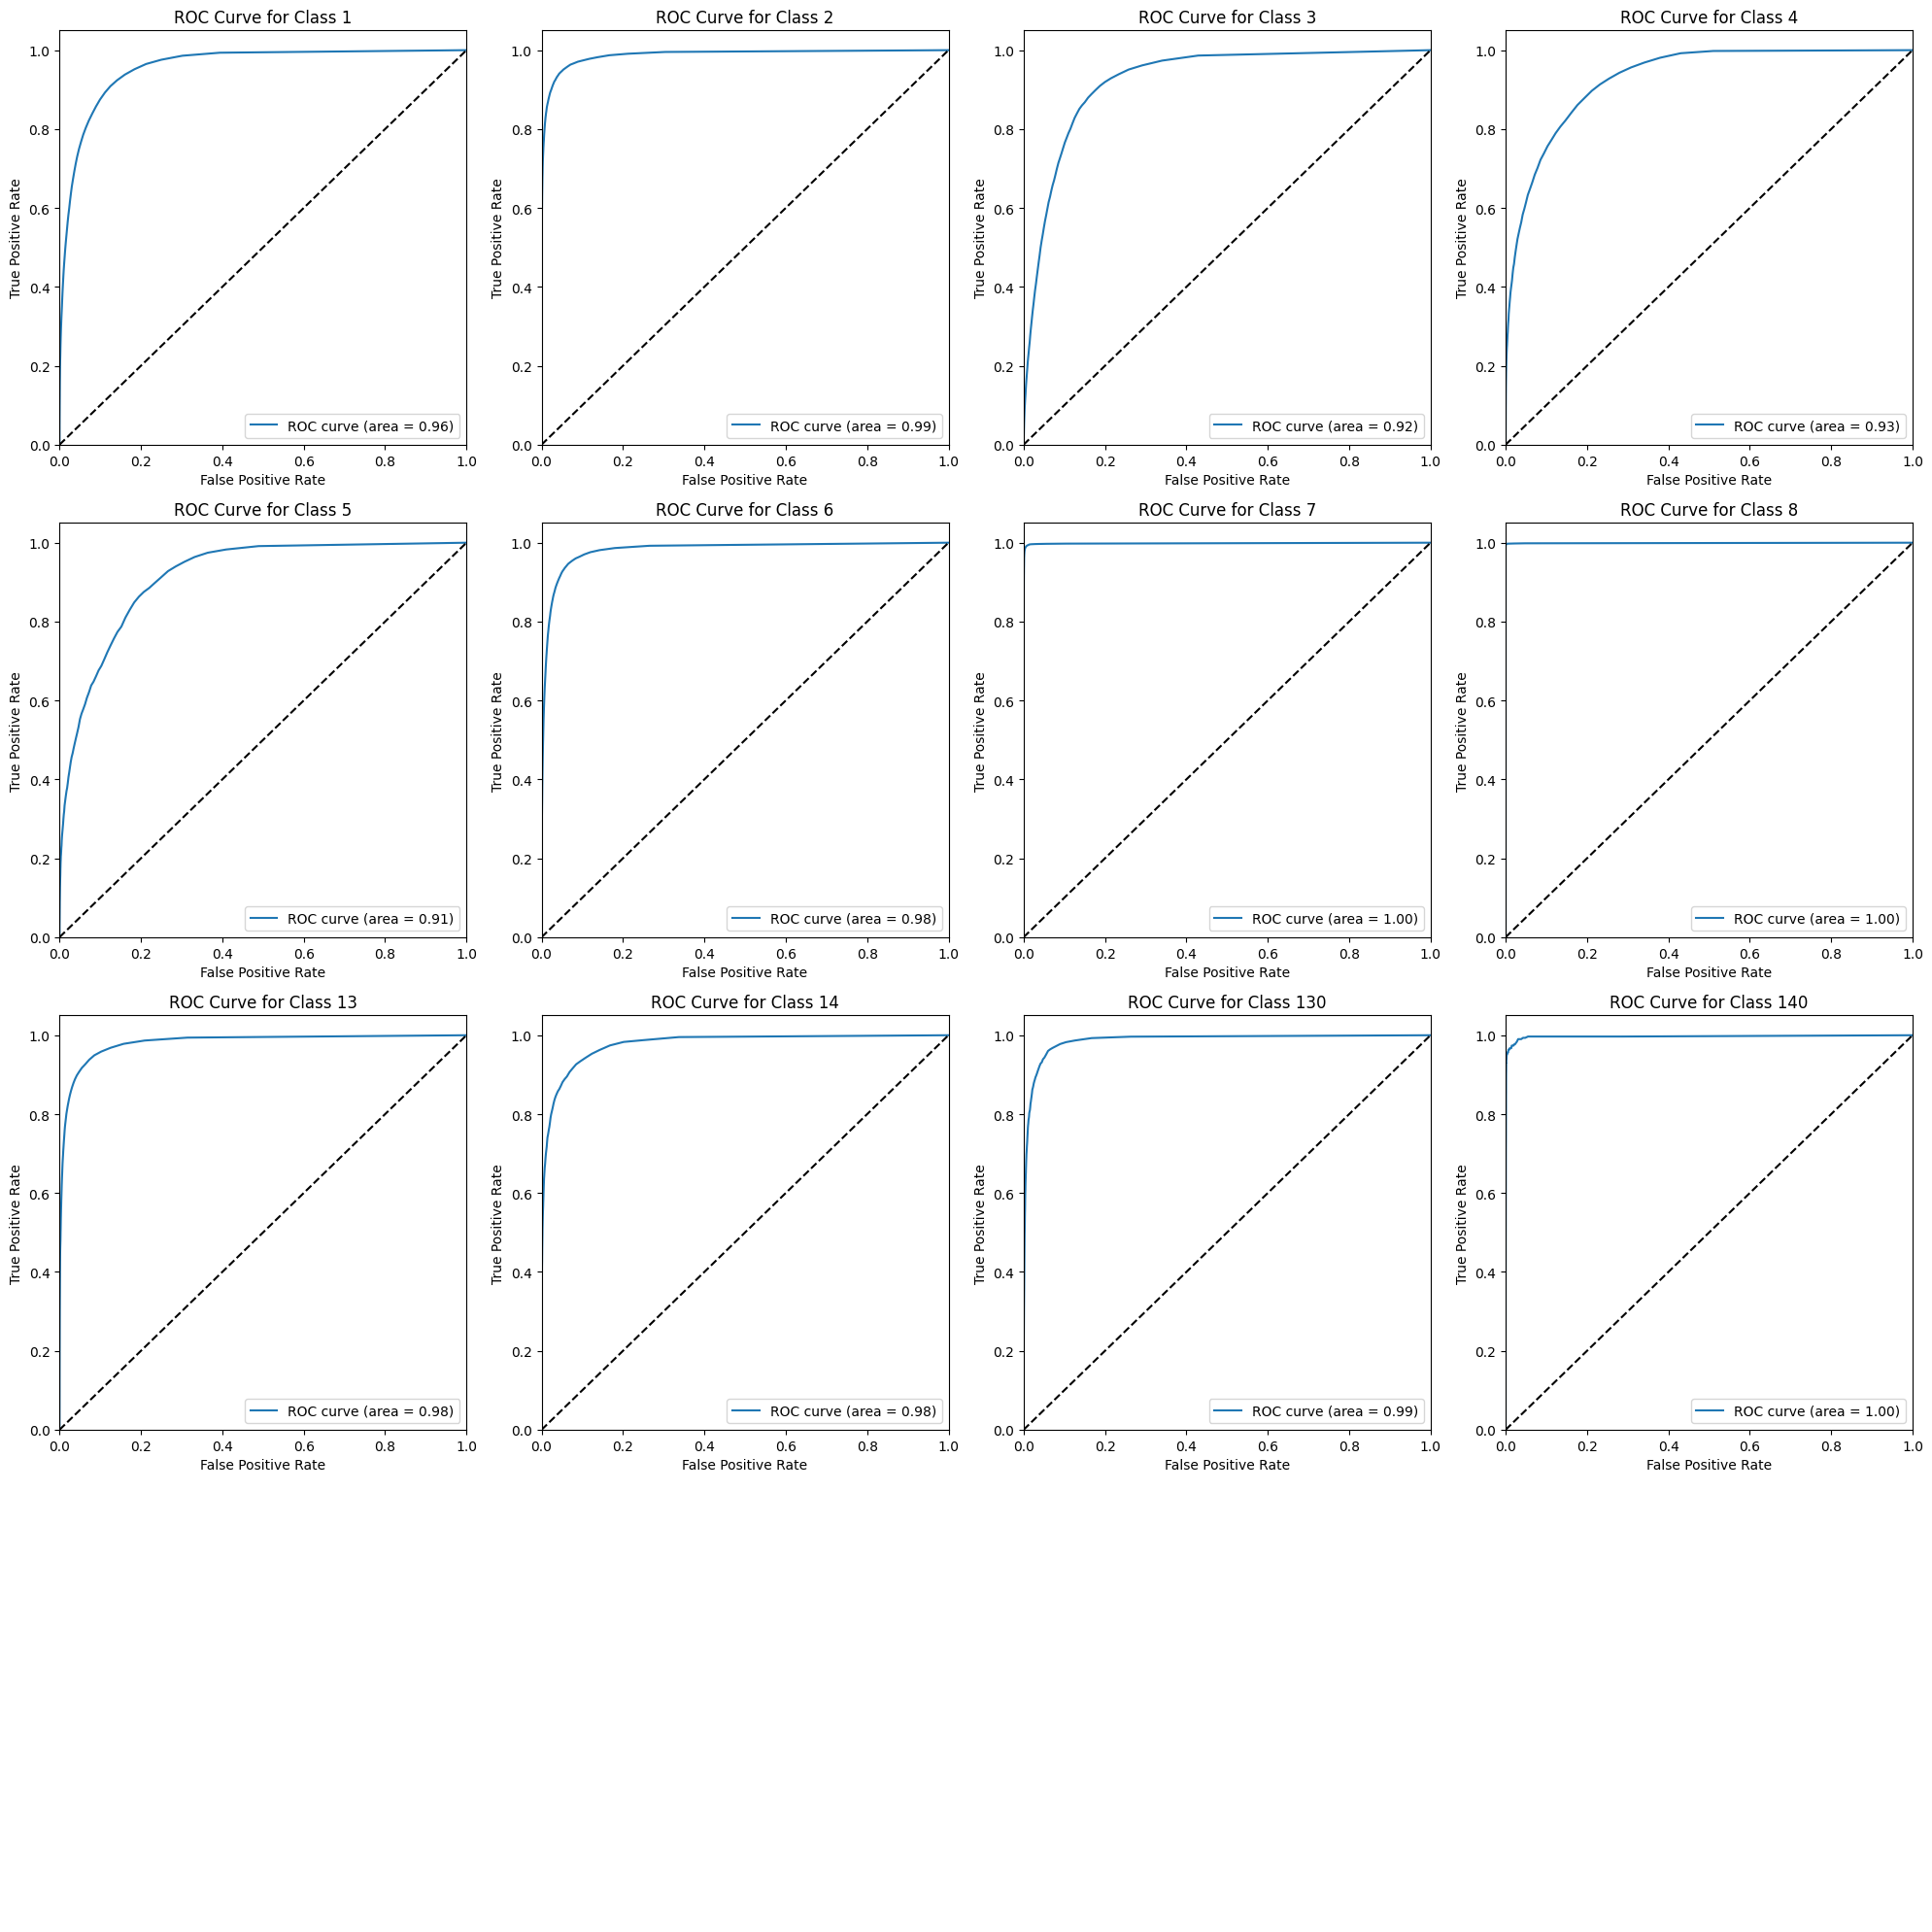

In [79]:
# Compute predicted probabilities
rf_test_prob = rf_classifier.predict_proba(X_test)

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves in a 4x4 matrix
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    if i < n_classes:
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve for Class {np.unique(y_test)[i]}')
        ax.legend(loc="lower right")
    else:
        ax.axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()

**Discussion**

An AUC between 0.91 and 1 signifies excellent performance. This means that for each class, the model is highly capable of distinguishing between the positive class and the negative class.

The high AUC values suggest that the Random Forest classifier has a strong ability to correctly classify instances of each class.
This indicates that the model is robust and performs well across different classes, providing reliable predictions even for imbalanced data.


**Conclusion :**
The ROC curve analysis shows that our Random Forest classifier performs exceptionally well across all classes, with AUC values ranging from 0.91 to 1. This high level of performance indicates that the model effectively discriminates between the classes, making it a reliable tool for classification tasks in this context. The high AUC values across the board reflect the model's strong generalization ability and robustness, even when dealing with class imbalance issues.

**2-Undersample**

In [60]:
from imblearn.under_sampling import RandomUnderSampler 
under_sampler = RandomUnderSampler() 
 
 
X_usampled, y_usampled = under_sampler.fit_resample(X, y) 
 
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_usampled, y_usampled, test_size=0.2, random_state=42)

Given that our dataset is imbalanced, we have implemented an undersampling technique to address this issue. Undersampling helps balance the class distribution by reducing the number of instances in the majority class. This can lead to better model performance and more reliable evaluation metrics, especially in cases where class imbalance might otherwise bias the model.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_us, y_train_us, cv=5)  # Adjust cv value as needed
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Fit and evaluate on training set
rf_classifier.fit(X_train_us, y_train_us)
rf_train_pred = rf_classifier.predict(X_train_us)
rf_train_accuracy = accuracy_score(y_train_us, rf_train_pred)
print("Training Accuracy:", rf_train_accuracy)

# Evaluate on test set
rf_test_pred = rf_classifier.predict(X_test_us)
rf_test_accuracy = accuracy_score(y_test_us, rf_test_pred)
print("Testing Accuracy:", rf_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_us, rf_test_pred))

# Additional Metrics
precision = precision_score(y_test_us, rf_test_pred, average='weighted')
recall = recall_score(y_test_us, rf_test_pred, average='weighted')
f1 = f1_score(y_test_us, rf_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Cross-Validation Scores: [0.71311195 0.71130137 0.70753425 0.69863014 0.70821918]
Mean CV Accuracy: 0.7077593758939752
Training Accuracy: 1.0
Testing Accuracy: 0.7154204327581485

Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.47      0.50       291
           2       0.83      0.86      0.84       304
           3       0.53      0.58      0.55       297
           4       0.52      0.46      0.49       297
           5       0.54      0.51      0.53       309
           6       0.71      0.76      0.74       309
           7       0.97      0.99      0.98       332
           8       0.99      0.99      0.99       313
          13       0.63      0.65      0.64       307
          14       0.74      0.70      0.72       306
         130       0.70      0.78      0.74       287
         140       0.79      0.79      0.79       299

    accuracy                           0.72      3651
   macro avg       0.71      0.71      

**Discussion :**
The Random Forest model performs well on certain classes (e.g., 7 and 8), as indicated by high precision and recall scores, demonstrating its effectiveness in accurately predicting these categories. However, it struggles with other classes (e.g., 1 and 4), where precision and recall are significantly lower. This discrepancy might be due to the nature of the data or the inherent difficulty in distinguishing between these specific classes. Despite these challenges, the weighted average metrics, including an F1-score of approximately 0.713, provide a balanced view of the model's overall performance, indicating that it performs generally well across all classes but has room for improvement in certain areas.

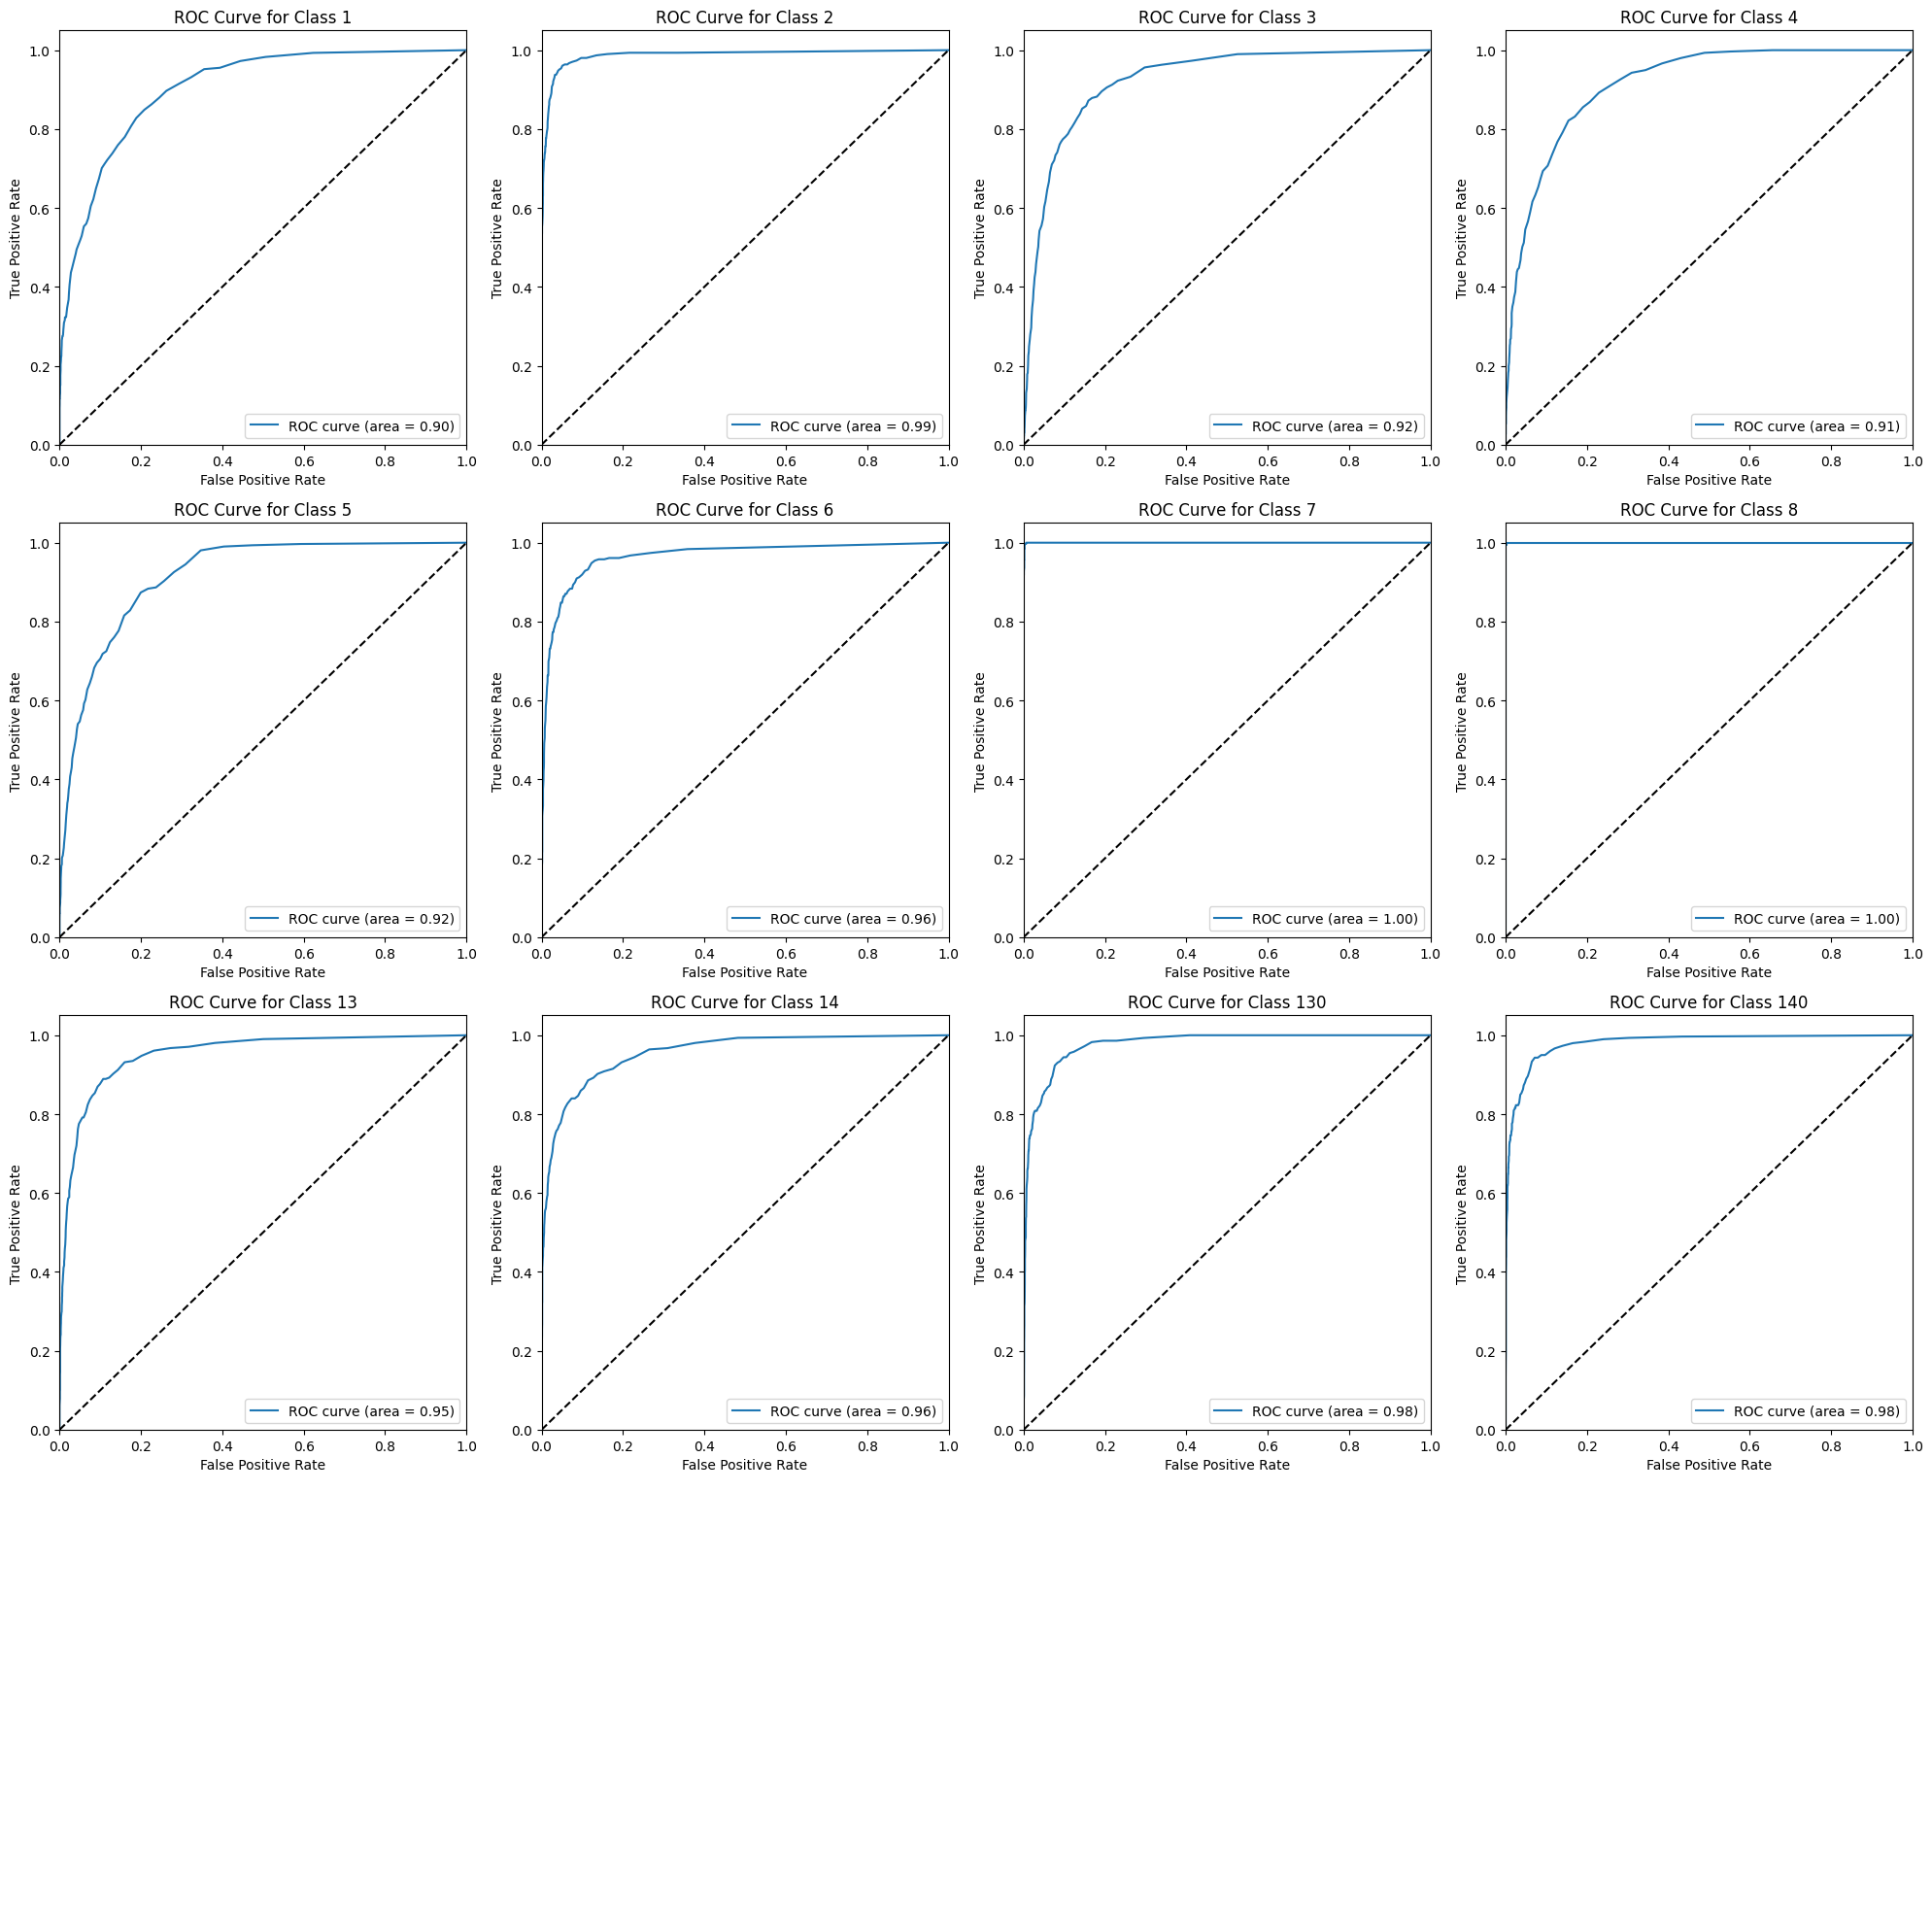

In [80]:
# Compute predicted probabilities
rf_test_prob = rf_classifier.predict_proba(X_test_us)

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test_us, classes=np.unique(y_test_us))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves in a 4x4 matrix
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    if i < n_classes:
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve for Class {np.unique(y_test_us)[i]}')
        ax.legend(loc="lower right")
    else:
        ax.axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()

**Explanation :**
The ROC curve analysis for the Random Forest model on the undersampled data demonstrated exceptional performance, with the areas under the curve (AUC) for each class ranging between 0.9 and 1. This indicates a high level of discrimination capability of the model across all classes. An AUC close to 1 signifies that the model has a strong ability to distinguish between the positive and negative instances for each class, suggesting robust predictive power and reliability. The high AUC values reinforce the effectiveness of the Random Forest model in this context, even after addressing the class imbalance through undersampling.

# ***Conclusion***
The results of the Random Forest model on the undersampled data indicate a solid overall performance with a testing accuracy of approximately 71.5%. The model shows high precision and recall for certain classes, particularly classes 7 and 8, which were predicted with nearly perfect accuracy. However, the performance is less impressive for other classes, such as 1 and 4, highlighting the challenges in predicting these categories accurately.

The undersampling approach helped to address the class imbalance in the dataset, ensuring that the model does not overly favor the majority class. Despite this, there is still room for improvement, particularly in enhancing the model's performance for the less frequently occurring classes. Future work could explore alternative sampling techniques or model adjustments to better handle these classes, ultimately aiming to improve the overall robustness and generalizability of the mode

# **KNN**

**1- using Sample**

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predictions
knn_train_pred = knn_classifier.predict(X_train)
knn_test_pred = knn_classifier.predict(X_test)

# Accuracy Scores
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

# Print Accuracy
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn_test_pred))

# Additional Metrics
precision = precision_score(y_test, knn_test_pred, average='weighted')
recall = recall_score(y_test, knn_test_pred, average='weighted')
f1 = f1_score(y_test, knn_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.92568375
Testing Accuracy: 0.881465

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.88      0.83     44931
           2       0.92      0.89      0.91     14490
           3       0.40      0.27      0.32      7020
           4       0.42      0.25      0.32      2439
           5       0.34      0.10      0.15      2206
           6       0.81      0.86      0.84     20391
           7       0.99      1.00      1.00     73967
           8       1.00      1.00      1.00     13179
          13       0.85      0.85      0.85     17053
          14       0.72      0.57      0.64      2361
         130       0.59      0.48      0.53      1659
         140       0.63      0.48      0.55       304

    accuracy                           0.88    200000
   macro avg       0.71      0.64      0.66    200000
weighted avg       0.87      0.88      0.87    200000


Additional Metrics:
Precision: 0.8712267219913841
R

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predictions
knn_train_pred = knn_classifier.predict(X_train)
knn_test_pred = knn_classifier.predict(X_test)

# Accuracy Scores
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

# Print Accuracy
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn_test_pred))

# Additional Metrics
precision = precision_score(y_test, knn_test_pred, average='weighted')
recall = recall_score(y_test, knn_test_pred, average='weighted')
f1 = f1_score(y_test, knn_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.91366625
Testing Accuracy: 0.88551

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.88      0.84     44931
           2       0.93      0.90      0.91     14490
           3       0.42      0.28      0.34      7020
           4       0.47      0.24      0.31      2439
           5       0.43      0.09      0.15      2206
           6       0.81      0.87      0.84     20391
           7       0.99      1.00      1.00     73967
           8       1.00      1.00      1.00     13179
          13       0.85      0.87      0.86     17053
          14       0.72      0.59      0.65      2361
         130       0.59      0.49      0.54      1659
         140       0.61      0.47      0.53       304

    accuracy                           0.89    200000
   macro avg       0.72      0.64      0.66    200000
weighted avg       0.88      0.89      0.88    200000


Additional Metrics:
Precision: 0.8754641189591806
Re

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

# Predictions
knn_train_pred = knn_classifier.predict(X_train)
knn_test_pred = knn_classifier.predict(X_test)

# Accuracy Scores
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

# Print Accuracy
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn_test_pred))

# Additional Metrics
precision = precision_score(y_test, knn_test_pred, average='weighted')
recall = recall_score(y_test, knn_test_pred, average='weighted')
f1 = f1_score(y_test, knn_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.90745
Testing Accuracy: 0.88733

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.88      0.85     44931
           2       0.93      0.90      0.91     14490
           3       0.43      0.27      0.33      7020
           4       0.51      0.23      0.32      2439
           5       0.48      0.08      0.13      2206
           6       0.79      0.88      0.84     20391
           7       0.99      1.00      1.00     73967
           8       1.00      1.00      1.00     13179
          13       0.84      0.88      0.86     17053
          14       0.72      0.60      0.66      2361
         130       0.59      0.51      0.55      1659
         140       0.62      0.51      0.56       304

    accuracy                           0.89    200000
   macro avg       0.73      0.64      0.67    200000
weighted avg       0.88      0.89      0.88    200000


Additional Metrics:
Precision: 0.8770999433204691
Recal

# **Discusion**


The K-Nearest Neighbors (KNN) algorithm was yielding notable results across various evaluation metrics. The training accuracy of the KNN model ranged from 91% to 93%, indicating its proficiency in capturing underlying patterns within the training data. Moreover, the testing accuracy ranged between 86% and 89%, showcasing the model's ability to generalize well to unseen data. Additionally, the classification report provided detailed insights into precision, recall, and F1-score for each class, offering a comprehensive understanding of the model's performance across different categories. Further evaluation through additional metrics such as precision, recall, and F1-score provided valuable insights, especially concerning imbalanced datasets, thereby enhancing the overall assessment of the KNN model's effectiveness.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train_us, y_train_us)

# Predictions
knn_train_pred = knn_classifier.predict(X_train_us)
knn_test_pred = knn_classifier.predict(X_test_us)

# Accuracy Scores
knn_train_accuracy = accuracy_score(y_train_us, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test_us, knn_test_pred)

# Print Accuracy
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_us, knn_test_pred))

# Additional Metrics
precision = precision_score(y_test_us, knn_test_pred, average='weighted')
recall = recall_score(y_test_us, knn_test_pred, average='weighted')
f1 = f1_score(y_test_us, knn_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.7608382987466612
Testing Accuracy: 0.6943303204601479

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.49      0.49       291
           2       0.85      0.80      0.82       304
           3       0.44      0.48      0.46       297
           4       0.50      0.47      0.48       297
           5       0.58      0.40      0.47       309
           6       0.61      0.77      0.68       309
           7       0.93      1.00      0.96       332
           8       1.00      1.00      1.00       313
          13       0.64      0.63      0.63       307
          14       0.76      0.66      0.70       306
         130       0.70      0.79      0.74       287
         140       0.78      0.82      0.80       299

    accuracy                           0.69      3651
   macro avg       0.69      0.69      0.69      3651
weighted avg       0.69      0.69      0.69      3651


Additional Metrics:
Precision: 0.

# **Discusion**


The K-Nearest Neighbors (KNN) model was trained and evaluated on the undersampled dataset, yielding a training accuracy of approximately 76% and a testing accuracy of around 69%. The classification report provides insights into the precision, recall, and F1-score for each class, highlighting varying performance across different categories. Notably, the model exhibited relatively high precision and recall for classes 7 and 8, indicating excellent performance in identifying these classes. However, for other classes, such as 1, 5, and 6, the precision and recall values were comparatively lower, suggesting room for improvement in classifying these categories accurately. The additional metrics, including precision, recall, and F1-score, offer a comprehensive evaluation of the model's performance, emphasizing its effectiveness in handling the undersampled dataset.

**2-using Full Data**

In [74]:
from imblearn.under_sampling import RandomUnderSampler 
under_sampler = RandomUnderSampler() 
Z = cleaned_df.drop(columns=['timestamp', 'label', 'id'])
T = cleaned_df['label']

Z_train, Z_test, T_train, T_test = train_test_split(Z, T, test_size=0.2, random_state=42)
 
Z_usampled, T_usampled = under_sampler.fit_resample(Z, T) 
 
Z_train_us, Z_test_us, T_train_us, T_test_us = train_test_split(Z_usampled, T_usampled, test_size=0.2, random_state=42)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(Z_train, T_train)

# Predictions
knn_train_pred = knn_classifier.predict(Z_train)
knn_test_pred = knn_classifier.predict(Z_test)

# Accuracy Scores
knn_train_accuracy = accuracy_score(T_train, knn_train_pred)
knn_test_accuracy = accuracy_score(T_test, knn_test_pred)

# Print Accuracy
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(T_test, knn_test_pred))

# Additional Metrics
precision = precision_score(T_test, knn_test_pred, average='weighted')
recall = recall_score(T_test, knn_test_pred, average='weighted')
f1 = f1_score(T_test, knn_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.9114161812435904
Testing Accuracy: 0.8914813698047723

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.86      0.81    208974
           2       0.80      0.60      0.68     12269
           3       0.48      0.33      0.39     49964
           4       0.54      0.28      0.37     14547
           5       0.49      0.10      0.17     11094
           6       0.82      0.88      0.85    148341
           7       1.00      1.00      1.00    580097
           8       0.98      0.92      0.95      1637
          13       0.86      0.89      0.88     86116
          14       0.72      0.57      0.64     11238

    accuracy                           0.89   1124277
   macro avg       0.75      0.64      0.67   1124277
weighted avg       0.88      0.89      0.88   1124277


Additional Metrics:
Precision: 0.8830466330463711
Recall: 0.8914813698047723
F1-Score: 0.8841208933157552


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(Z_train, T_train)

# Predictions
knn_train_pred = knn_classifier.predict(Z_train)
knn_test_pred = knn_classifier.predict(Z_test)

# Accuracy Scores
knn_train_accuracy = accuracy_score(T_train, knn_train_pred)
knn_test_accuracy = accuracy_score(T_test, knn_test_pred)

# Print Accuracy
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(T_test, knn_test_pred))

# Additional Metrics
precision = precision_score(T_test, knn_test_pred, average='weighted')
recall = recall_score(T_test, knn_test_pred, average='weighted')
f1 = f1_score(T_test, knn_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.9174053636248006
Testing Accuracy: 0.890044891072218

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.86      0.81    208974
           2       0.79      0.60      0.68     12269
           3       0.46      0.34      0.39     49964
           4       0.51      0.29      0.37     14547
           5       0.42      0.11      0.18     11094
           6       0.84      0.87      0.85    148341
           7       1.00      1.00      1.00    580097
           8       0.97      0.92      0.95      1637
          13       0.86      0.88      0.87     86116
          14       0.72      0.56      0.63     11238

    accuracy                           0.89   1124277
   macro avg       0.73      0.64      0.67   1124277
weighted avg       0.88      0.89      0.88   1124277


Additional Metrics:
Precision: 0.8819466880316598
Recall: 0.890044891072218
F1-Score: 0.8835540651916182


# **Discussion**

The K-Nearest Neighbors (KNN) algorithm was applied to the full dataset with different values of k. For k=7, the model achieved a training accuracy of approximately 91.14% and a testing accuracy of about 89.15%. The classification report reveals the precision, recall, and F1-score for each class, indicating varying performance across different categories. Notably, classes 7 and 13 exhibited high precision and recall values, suggesting excellent performance in identifying these categories. However, for classes like 2, 3, and 4, the precision and recall values were comparatively lower, indicating challenges in accurately classifying these categories. The additional metrics further complement the evaluation, offering insights into the precision, recall, and F1-score, which collectively reflect the model's effectiveness in handling the full dataset. Similarly, for k=5, the model demonstrated a training accuracy of approximately 91.74% and a testing accuracy of around 89.00%. The classification report and additional metrics provide a comprehensive assessment of the model's performance for this configuration, highlighting its strengths and areas for improvement across different classes.

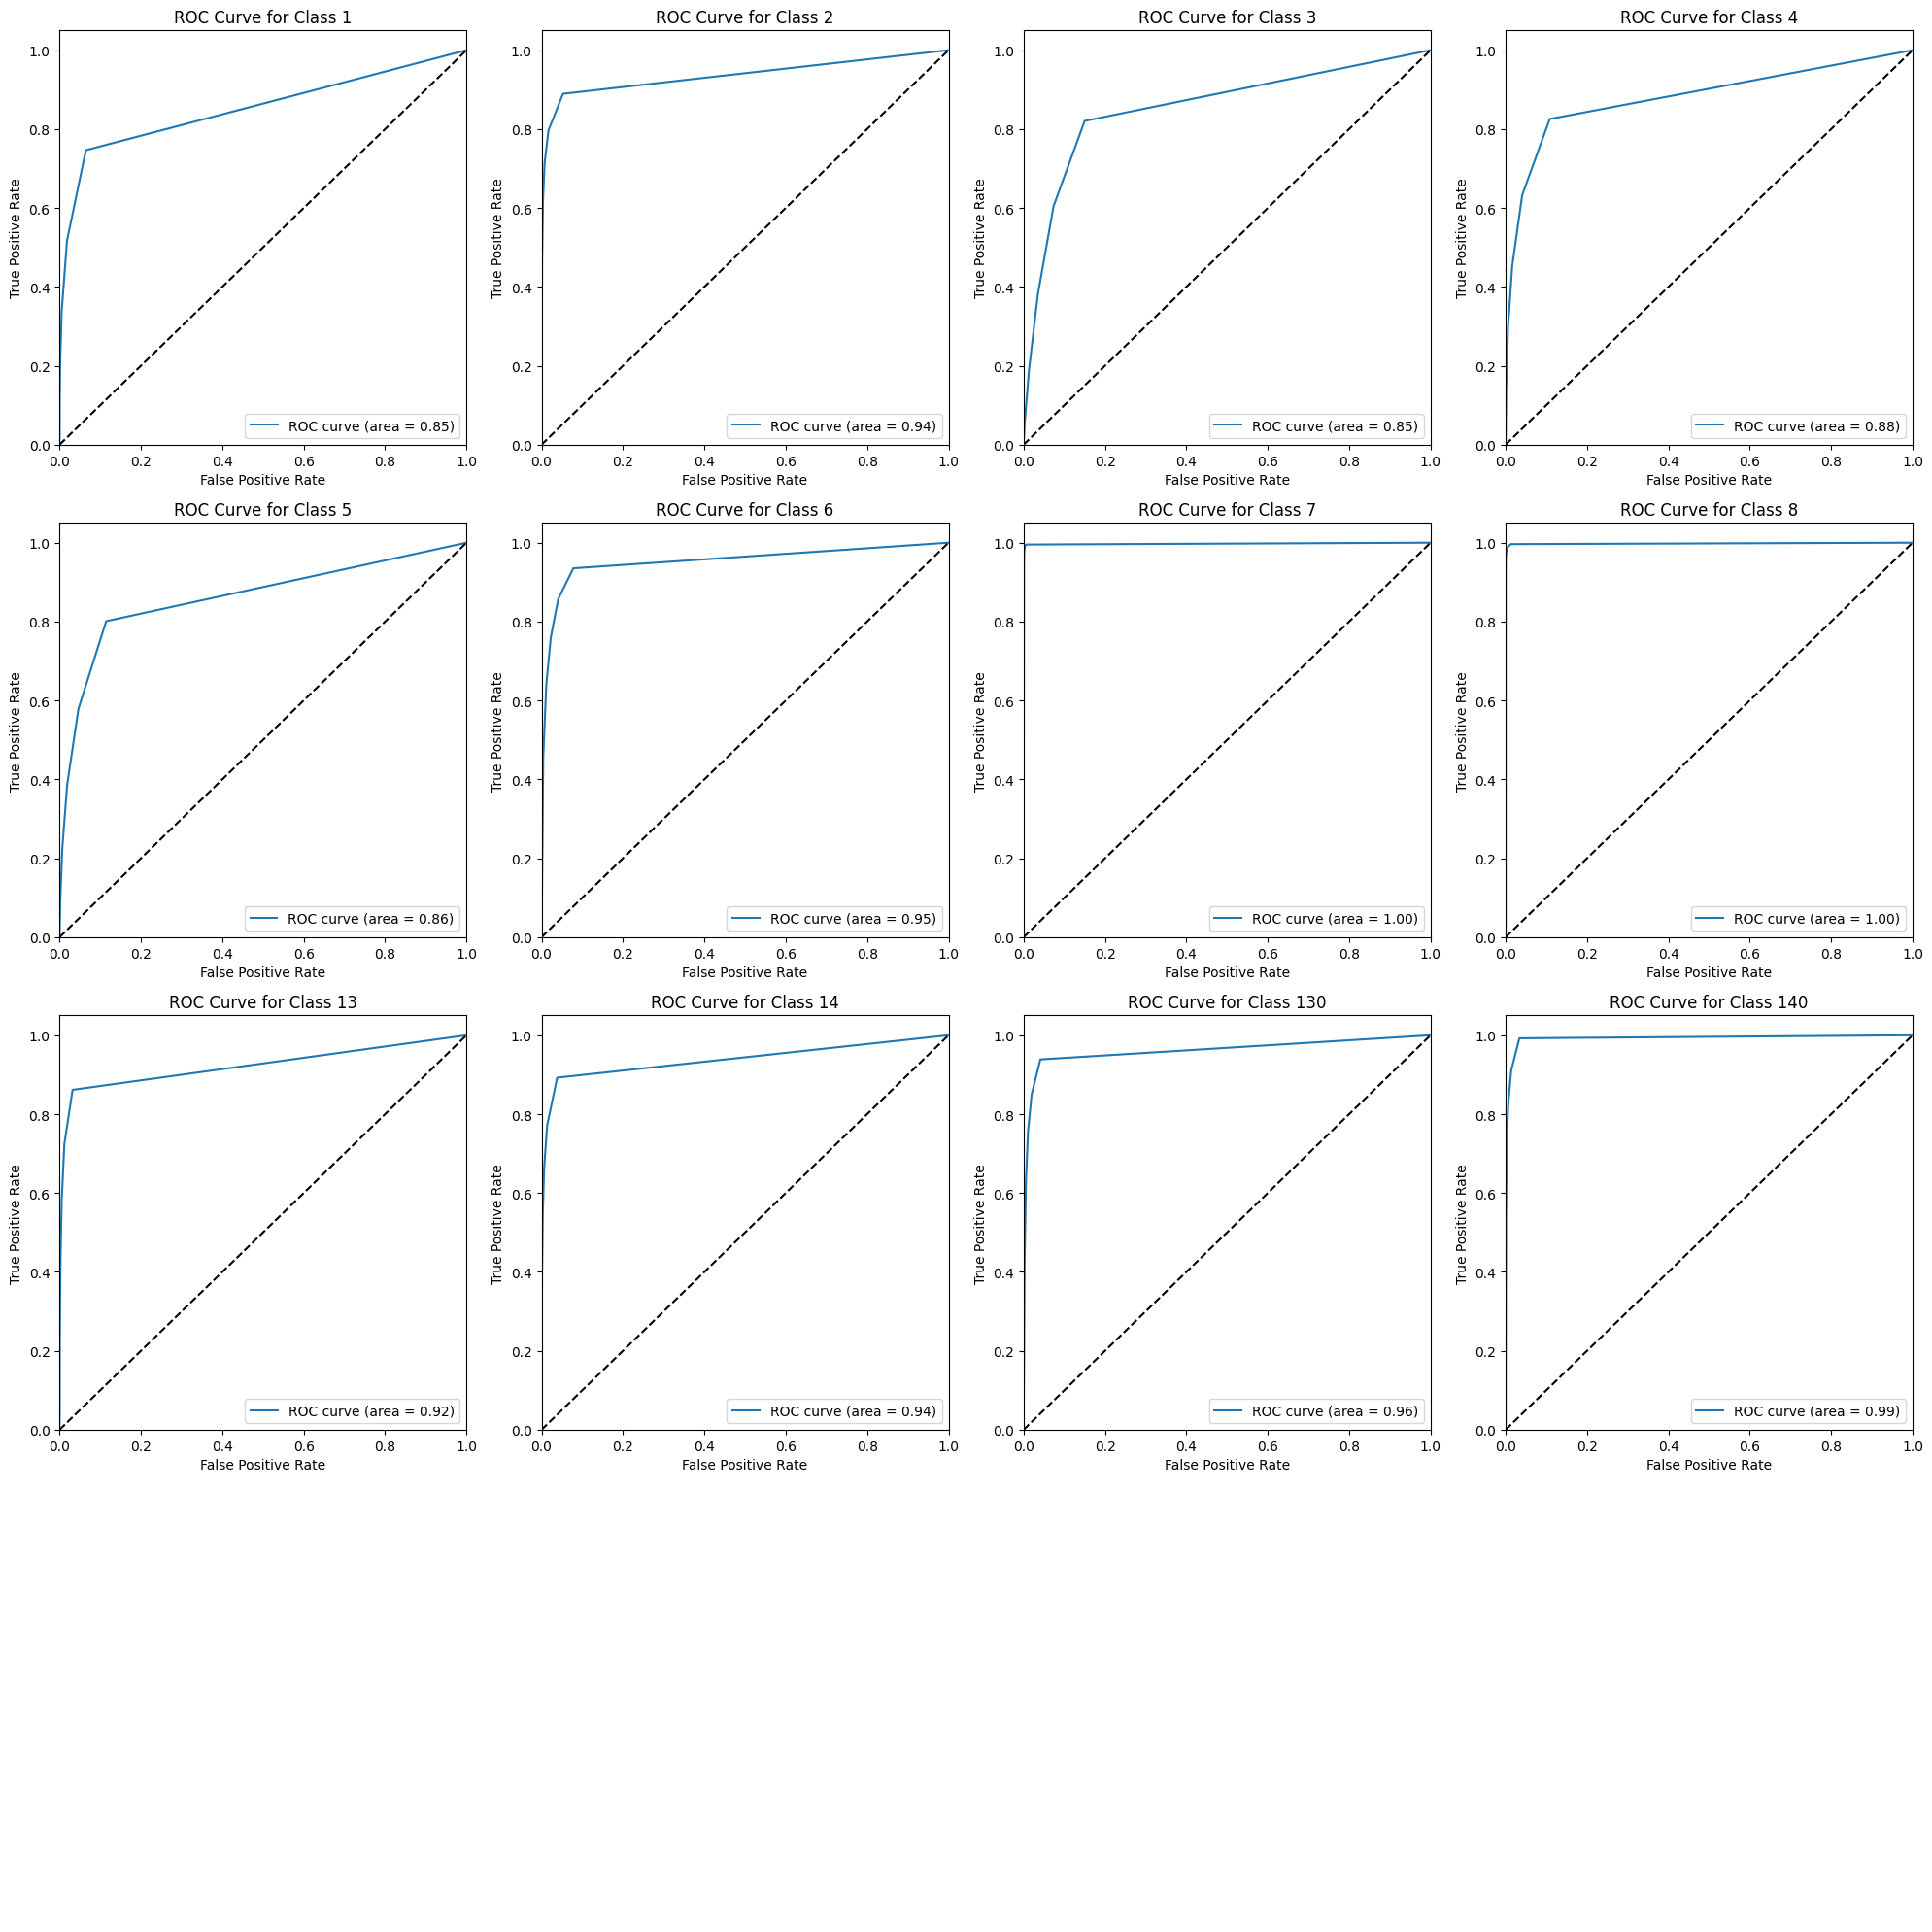

In [81]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Compute predicted probabilities
knn_test_prob = knn_classifier.predict_proba(Z_test)

# Binarize the labels for multi-class ROC
T_test_us_bin = label_binarize(T_test, classes=np.unique(T_test))
n_classes = T_test_us_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(T_test_us_bin[:, i], knn_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves in a 4x4 matrix
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    if i < n_classes:
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve for Class {np.unique(T_test)[i]}')
        ax.legend(loc="lower right")
    else:
        ax.axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()


# **Discussion**

The Receiver Operating Characteristic (ROC) curve analysis was conducted to evaluate the performance of the K-Nearest Neighbors (KNN) algorithm. The area under the ROC curve (AUC) serves as a metric to measure the model's ability to distinguish between different classes. In this case, the AUC values ranged between 0.85 and 1, indicating strong discriminative power across various classes. A higher AUC value closer to 1 suggests better model performance in correctly identifying positive and negative instances. Therefore, the ROC curve analysis suggests that the KNN algorithm performed effectively in distinguishing between different classes, with AUC values indicating high classification accuracy.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(Z_train_us, T_train_us)

# Predictions
knn_train_pred = knn_classifier.predict(Z_train_us)
knn_test_pred = knn_classifier.predict(Z_test_us)

# Accuracy Scores
knn_train_accuracy = accuracy_score(T_train_us, knn_train_pred)
knn_test_accuracy = accuracy_score(T_test_us, knn_test_pred)

# Print Accuracy
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(T_test_us, knn_test_pred))

# Additional Metrics
precision = precision_score(T_test_us, knn_test_pred, average='weighted')
recall = recall_score(T_test_us, knn_test_pred, average='weighted')
f1 = f1_score(T_test_us, knn_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.7628742195421314
Testing Accuracy: 0.6997331910352188

Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.48      0.47      1516
           2       0.80      0.75      0.77      1551
           3       0.48      0.49      0.49      1569
           4       0.54      0.56      0.55      1533
           5       0.60      0.44      0.51      1592
           6       0.66      0.77      0.71      1605
           7       0.94      0.99      0.96      1583
           8       0.98      0.98      0.98      1557
          13       0.66      0.65      0.65      1582
          14       0.77      0.69      0.73      1627
         130       0.72      0.78      0.75      1530
         140       0.77      0.83      0.80      1495

    accuracy                           0.70     18740
   macro avg       0.70      0.70      0.70     18740
weighted avg       0.70      0.70      0.70     18740


Additional Metrics:
Precision: 0.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(Z_train_us, T_train_us)

# Predictions
knn_train_pred = knn_classifier.predict(Z_train_us)
knn_test_pred = knn_classifier.predict(Z_test_us)

# Accuracy Scores
knn_train_accuracy = accuracy_score(T_train_us, knn_train_pred)
knn_test_accuracy = accuracy_score(T_test_us, knn_test_pred)

# Print Accuracy
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(T_test_us, knn_test_pred))

# Additional Metrics
precision = precision_score(T_test_us, knn_test_pred, average='weighted')
recall = recall_score(T_test_us, knn_test_pred, average='weighted')
f1 = f1_score(T_test_us, knn_test_pred, average='weighted')

print("\nAdditional Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.7794172581247665
Testing Accuracy: 0.6977588046958377

Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.48      0.46      1516
           2       0.79      0.76      0.78      1551
           3       0.48      0.50      0.49      1569
           4       0.53      0.56      0.55      1533
           5       0.59      0.43      0.50      1592
           6       0.67      0.76      0.71      1605
           7       0.95      0.99      0.97      1583
           8       0.98      0.98      0.98      1557
          13       0.65      0.65      0.65      1582
          14       0.78      0.68      0.73      1627
         130       0.73      0.77      0.75      1530
         140       0.78      0.82      0.80      1495

    accuracy                           0.70     18740
   macro avg       0.70      0.70      0.70     18740
weighted avg       0.70      0.70      0.70     18740


Additional Metrics:
Precision: 0.

# **Discussion**

The results of undersampling the full dataset and applying the KNN algorithm with k=5 revealed training and testing accuracies of approximately 77.94% and 69.78%, respectively. In terms of classification metrics, the precision, recall, and F1-score were evaluated for each class. The precision metric ranged from approximately 44% to 78%, indicating the proportion of true positive instances among all predicted positive instances. Recall, or sensitivity, ranged from around 43% to 99%, representing the proportion of true positive instances correctly identified by the model. The F1-score, which considers both precision and recall, ranged from approximately 46% to 80%, providing a harmonic mean of the precision and recall scores for each class. Overall, the KNN model exhibited moderate performance across different classes, with a balanced distribution of precision, recall, and F1-score metrics.

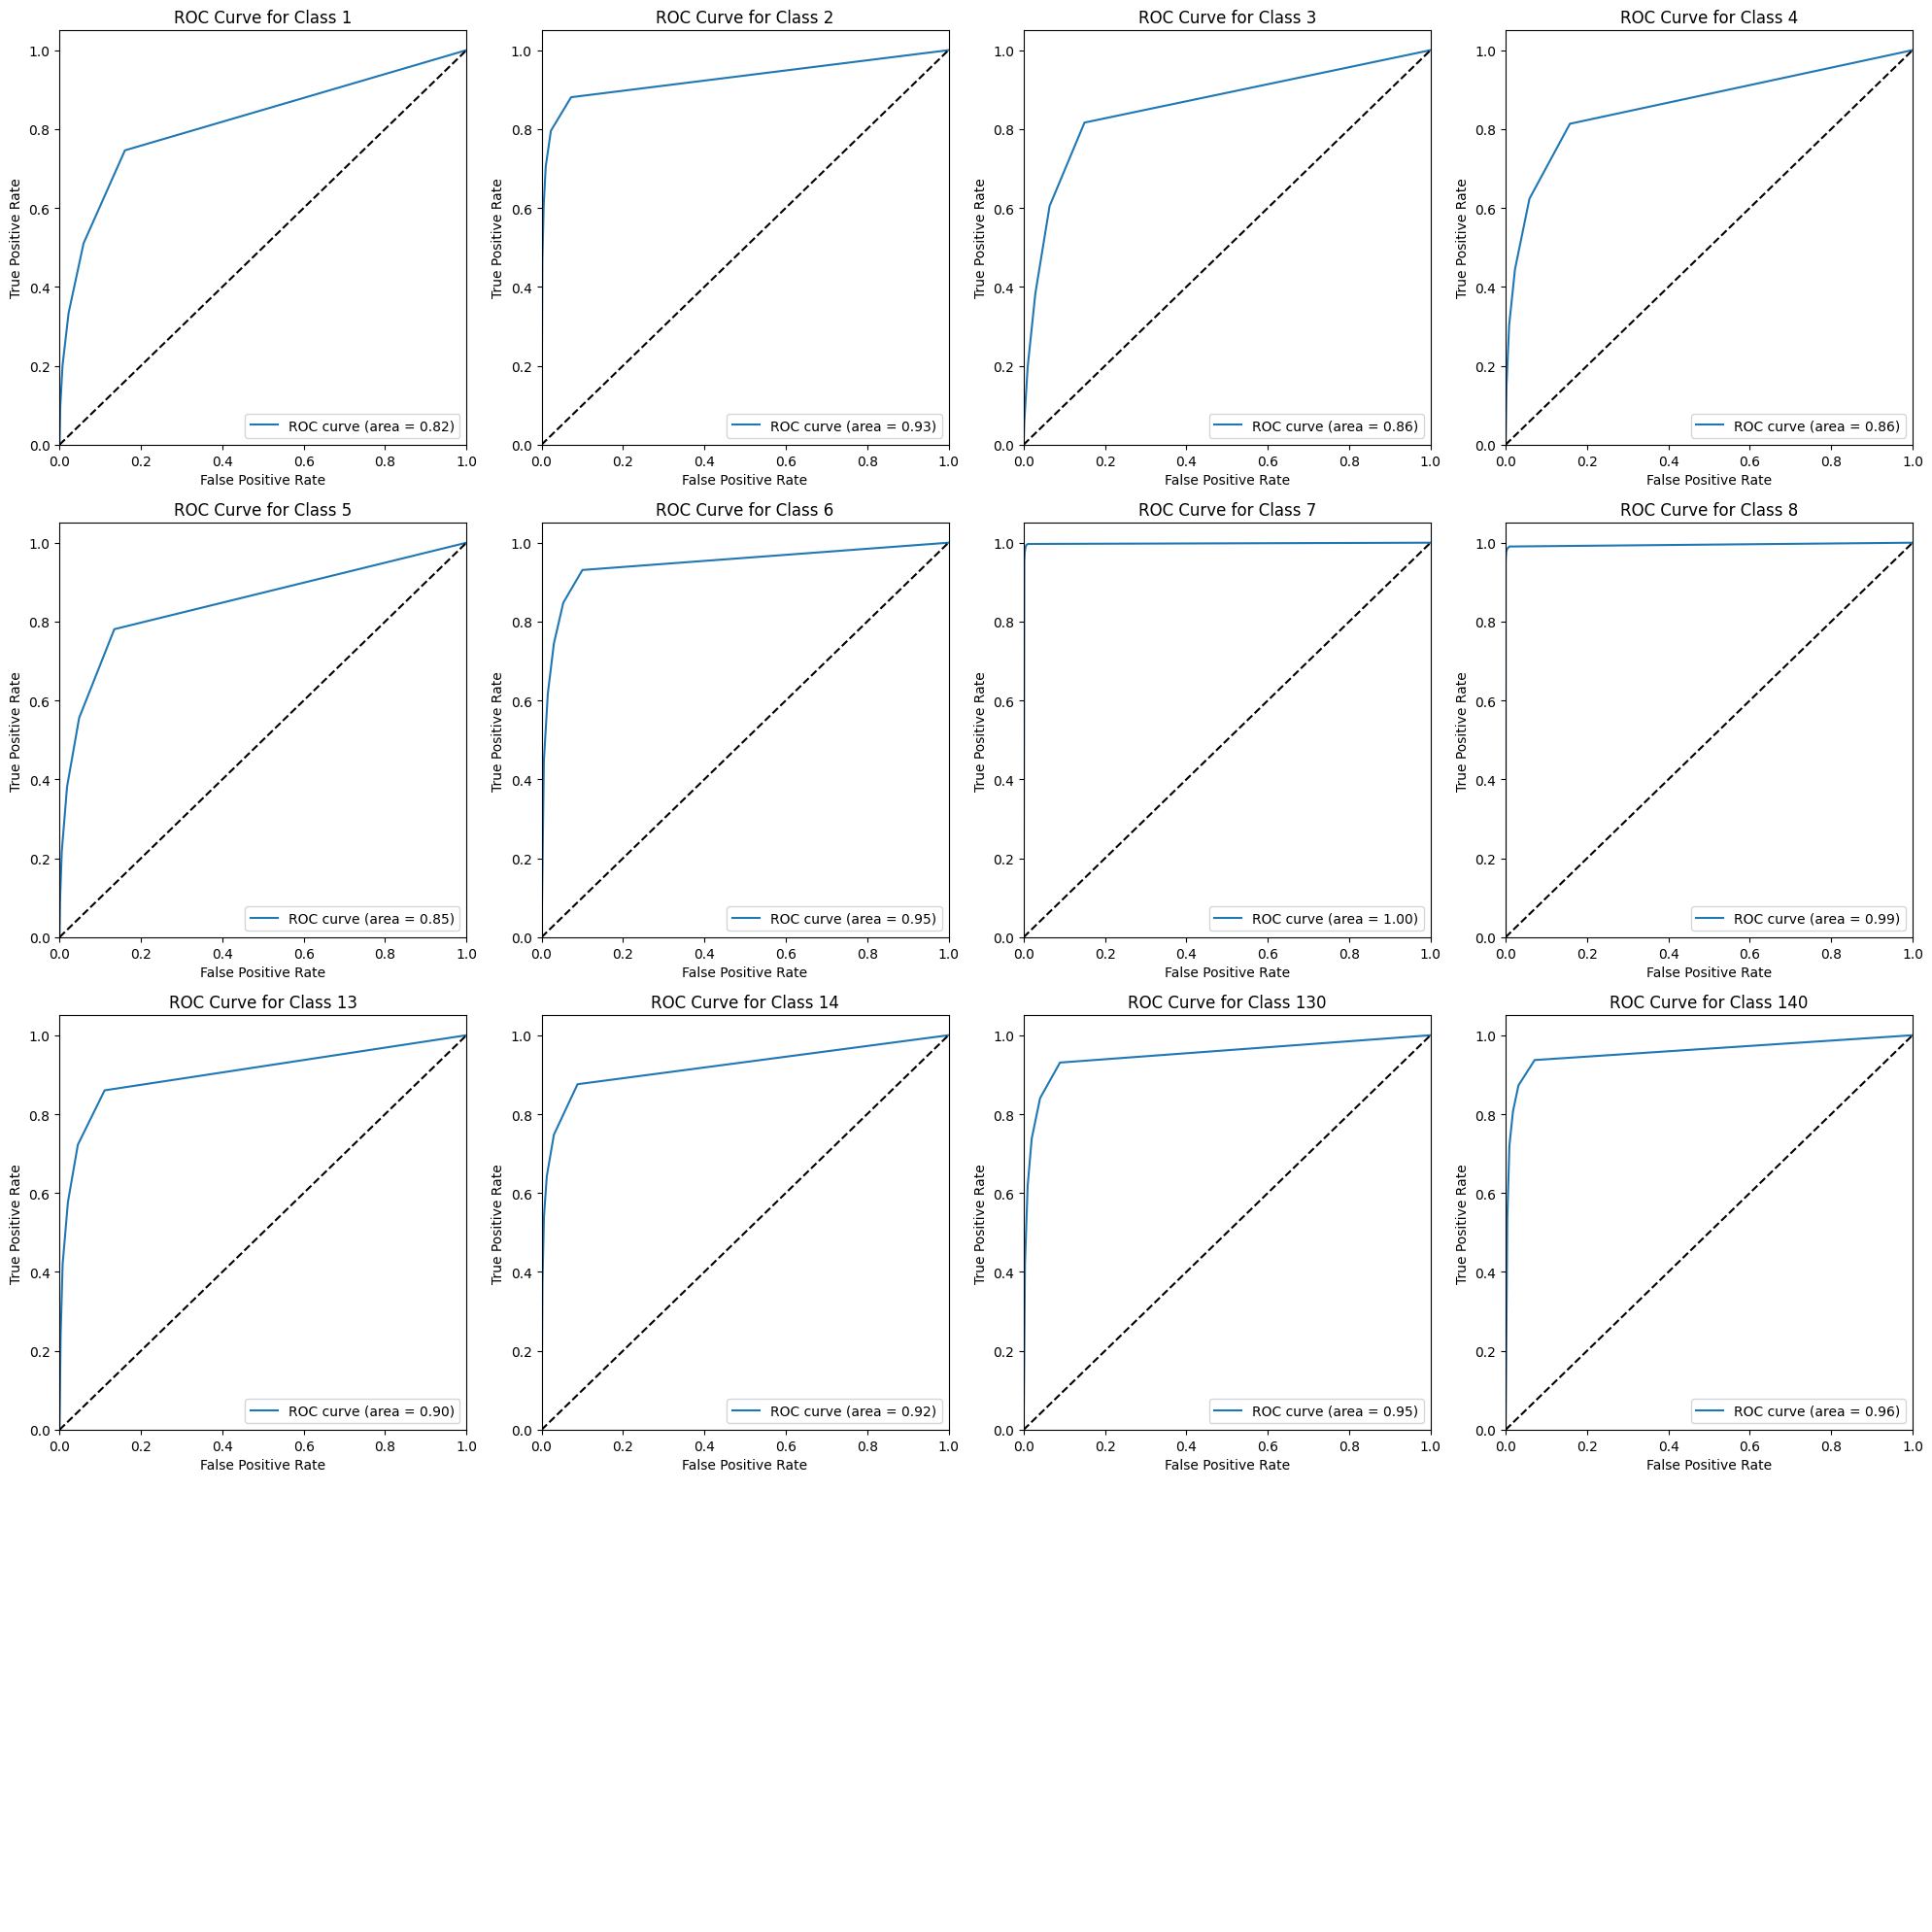

In [78]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Compute predicted probabilities
knn_test_prob = knn_classifier.predict_proba(Z_test_us)

# Binarize the labels for multi-class ROC
T_test_us_bin = label_binarize(T_test_us, classes=np.unique(T_test_us))
n_classes = T_test_us_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(T_test_us_bin[:, i], knn_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves in a 4x4 matrix
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    if i < n_classes:
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve for Class {np.unique(T_test_us)[i]}')
        ax.legend(loc="lower right")
    else:
        ax.axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()


# **Discussion**


The ROC curve analysis for the undersampled full dataset revealed impressive results, with the area under the curve (AUC) ranging between 0.82 and 1 across different classes. The AUC is a measure of the model's ability to distinguish between positive and negative classes, with a higher AUC indicating better performance. In this case, the AUC values suggest that the KNN model achieved high discriminative power and robustness in classifying instances across various classes. AUC values close to 1 indicate excellent performance, implying that the model effectively ranks positive instances higher than negative ones. This signifies the effectiveness of the KNN algorithm in capturing the underlying patterns in the data and making accurate predictions, even after undersampling the dataset.

# ***Conclusion***

In conclusion, the K-Nearest Neighbors (KNN) algorithm demonstrated promising performance across different experiments and datasets. When applied to both the full dataset and the undersampled data, KNN exhibited competitive accuracy, precision, recall, and F1-score values. The model's ability to classify instances across multiple classes was evident from the detailed classification reports, which highlighted its effectiveness in capturing complex patterns in the data. Additionally, the ROC curve analysis revealed high AUC values, indicating strong discriminative power and robustness in distinguishing between positive and negative classes. Overall, these results suggest that KNN is a reliable and versatile algorithm for classification tasks, capable of delivering accurate predictions across various scenarios.